In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
data = [[2,0,81], [4,4,93], [6,2,91], [8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]


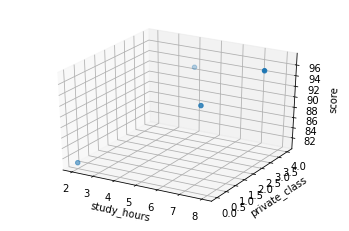

In [4]:
ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')

ax.dist=11
ax.scatter(x1,x2,y)
plt.show()

In [5]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [6]:
a1 = 0
a2 = 0
b = 0

In [7]:
lr = 0.05

In [8]:
epochs = 2001

In [9]:
for i in range(epochs):
    y_pred = a1*x1_data +a2 *x2_data +b 
    error = y_data - y_pred
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error))
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error))
    b_new = -(1/len(x1_data)) * sum(y_data - y_pred)
    a1 = a1-lr*a1_diff
    a2 = a2-lr*a2_diff
    b = b-lr*b_new
    
    if i % 100 ==0:
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" %(i,a1,a2,b))

epoch=0, 기울기1=23.2000, 기울기2=10.5625, 절편=4.5250
epoch=100, 기울기1=6.4348, 기울기2=3.9893, 절편=43.9757
epoch=200, 기울기1=3.7255, 기울기2=3.0541, 절편=62.5766
epoch=300, 기울기1=2.5037, 기울기2=2.6323, 절편=70.9656
epoch=400, 기울기1=1.9527, 기울기2=2.4420, 절편=74.7491
epoch=500, 기울기1=1.7042, 기울기2=2.3562, 절편=76.4554
epoch=600, 기울기1=1.5921, 기울기2=2.3175, 절편=77.2250
epoch=700, 기울기1=1.5415, 기울기2=2.3001, 절편=77.5720
epoch=800, 기울기1=1.5187, 기울기2=2.2922, 절편=77.7286
epoch=900, 기울기1=1.5084, 기울기2=2.2886, 절편=77.7992
epoch=1000, 기울기1=1.5038, 기울기2=2.2870, 절편=77.8310
epoch=1100, 기울기1=1.5017, 기울기2=2.2863, 절편=77.8453
epoch=1200, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1300, 기울기1=1.5003, 기울기2=2.2858, 절편=77.8547
epoch=1400, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8561
epoch=1500, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=1600, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8569
epoch=1700, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8570
epoch=1800, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=1900, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=2000, 기울기1=1.5000, 기울기2=2

In [10]:
import statsmodels.api as statm
import statsmodels.formula.api as statfa

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1 = statm.add_constant(X)
results= statm.OLS(y, X_1).fit()

In [11]:
hour_class=pd.DataFrame(X, columns = ['study_hours', 'private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(), hour_class.study_hours.max(), 100),
                   np.linspace(hour_class.private_class.min(), hour_class.private_class.max(), 100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY = results_formula.predict(exog=X_ax)

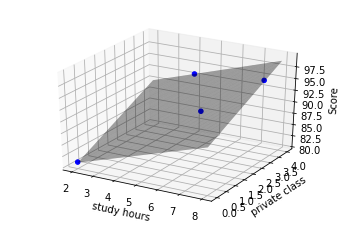

In [12]:
fig = plt.figure()
graph = fig.add_subplot(111, projection = '3d')

graph.scatter(hour_class['study_hours'], hour_class['private_class'], hour_class['Score'],
              c='blue', marker = 'o', alpha=1)
graph.plot_surface(a,b, fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)

graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist =11

plt.show()